# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Loading the Data set

In [1]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Choosing number of clusters

<function matplotlib.pyplot.show(*args, **kw)>

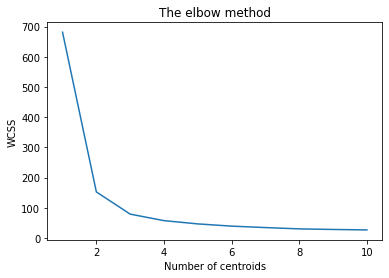

In [2]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans
wcss = []

#Loop from 1 to 11 to know the perfect number of clusters.

for i in range(1,11):
    
  Kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
  Kmeans.fit(iris_df)
  wcss.append(Kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.show

* **Observation**: We can conclude from last graph that the perfect number of cluster is ***3***.

# Implementing the model

In [ ]:
Kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
y_clusters = Kmeans.fit_predict(iris_df)
y_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
iris_df = iris_df.iloc[:, [0, 1, 2, 3]].values

# Visualizing the data set after clustering

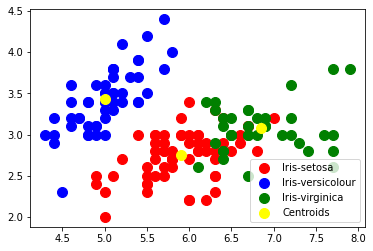

In [ ]:
plt.scatter(iris_df[y_clusters == 0, 0], iris_df[y_clusters == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_df[y_clusters == 1, 0], iris_df[y_clusters == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris_df[y_clusters == 2, 0], iris_df[y_clusters == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()